In [1]:
using ConstraintPropagation, ValidatedNumerics

In [2]:
include("draw_boxes.jl")

draw_boxes (generic function with 4 methods)

In [3]:
S1 = @separator x^2 + y^2 <= 1

Separator:
  - variables: [:x,:y]

In [4]:
function draw(inner)
    draw_boxes(inner, "green", 0.5)
    axis("image")
end

function draw(inner, boundary)
    draw_boxes(inner, "green", 0.5)
    draw_boxes(boundary, "gray", 0.5)
    axis("image")
end

draw (generic function with 3 methods)

(inner2,outer2) = ([-1, 1] × [-1, 1],[-100, 100] × [-100, 100])
(inner2,outer2) = ([0, 1] × [-1, 1],[0, 1] × [-1, 1])
(inner2,outer2) = ([0, 1] × [0, 1],[0, 1] × [0, 1])
(inner2,outer2) = ([0.5, 1] × [0, 0.866026],[0.5, 1] × [0, 1])
(inner2,outer2) = ([0.5, 0.901388] × [0.433012, 0.866026],[0.5, 1] × [0.433012, 0.866026])
(inner2,outer2) = ([0.5, 0.760346] × [0.649519, 0.866026],[0.5, 0.901388] × [0.649519, 0.866026])
(inner2,outer2) = ([0.630172, 0.760346] × [0.649519, 0.776456],[0.630172, 0.760346] × [0.649519, 0.866026])
(inner2,outer2) = ([0.695258, 0.760346] × [0.649519, 0.71876],[0.695258, 0.760346] × [0.649519, 0.776456])
(inner2,outer2) = ([0.695258, 0.729352] × [0.684139, 0.71876],[0.695258, 0.760346] × [0.684139, 0.71876])
(inner2,outer2) = ([0.695258, 0.71272] × [0.701449, 0.71876],[0.695258, 0.729352] × [0.701449, 0.71876])
(inner2,outer2) = ([0.703989, 0.71272] × [0.701449, 0.710211],[0.703989, 0.71272] × [0.701449, 0.71876])
(inner2,outer2) = ([0.695258, 0.70399] × [0.701

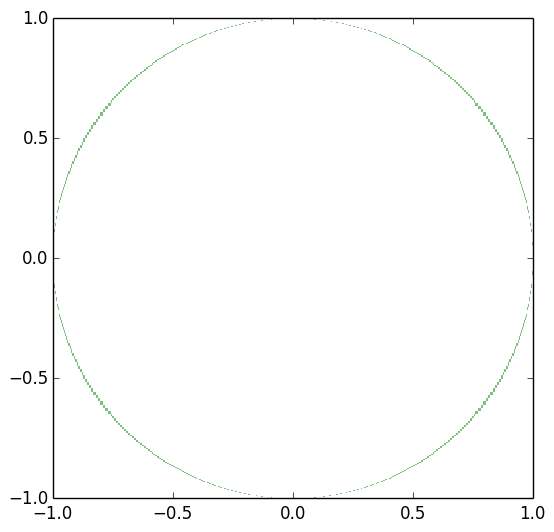

(-0.9999999999999999,0.9999999999999999,-1.0,1.0)

In [7]:
X = IntervalBox(-100..100, -100..100)
inner, boundary = set_inversion(S1, X, ldexp(1., -6))
draw(boundary)

In [6]:
inner

0-element Array{ValidatedNumerics.IntervalBox{2,Float64},1}

In [24]:
area(X::IntervalBox) = prod(map(diam, X))

function area(inner, boundary)
    lower = sum(map(area, inner))
    upper = lower + sum(map(area, boundary)) 
    return hull(lower, upper)
end

area (generic function with 2 methods)

Calculate area of inner and boundary pavings:

In [26]:
X = IntervalBox(-2..2, -2..2)

for i in 2:10

    @time inner, boundary = set_inversion(S1, X, ldexp(1., -i))
    @show i, area(inner, boundary), length(inner), length(boundary)
end

  0.078540 seconds (461.84 k allocations: 13.718 MB, 17.09% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (2,[2.25, 3.875],24,104)
  0.117961 seconds (885.93 k allocations: 26.305 MB, 13.72% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (3,[2.6875, 3.46875],60,200)
  0.214673 seconds (1.70 M allocations: 50.554 MB, 13.65% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (4,[2.92968, 3.3125],140,392)
  0.427380 seconds (3.31 M allocations: 98.117 MB, 16.17% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (5,[3.03906, 3.22852],284,776)
  0.816715 seconds (6.48 M allocations: 192.316 MB, 13.92% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (6,[3.08984, 3.18409],552,1544)
  1.700183 seconds (12.80 M allocations: 379.789 MB, 14.96% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (7,[3.11718, 3.16419],1152,3080)
  3.312877 seconds (25.40 M allocations: 753.815 MB, 14.98% gc 

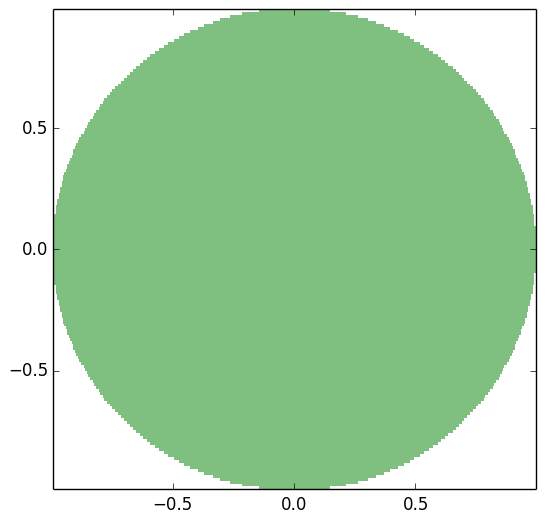

(-0.994873046875,0.9948730468750001,-0.98876953125,0.98876953125)

In [18]:
draw(inner)

In [19]:
length(inner)

8628

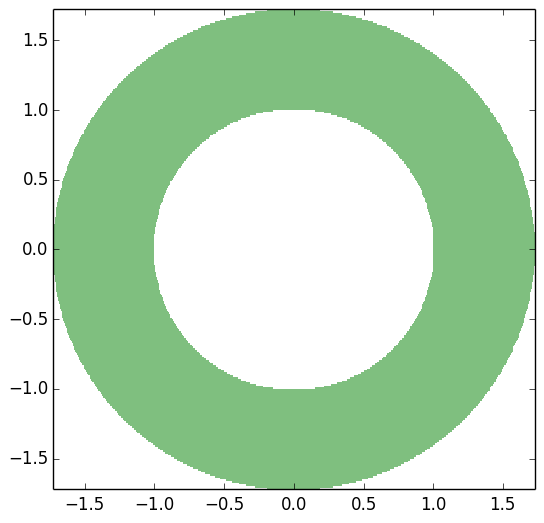

(-1.727294921875,1.7272949218749998,-1.72119140625,1.72119140625)

In [20]:
S2 = @separator 1 <= x^2 + y^2 <= 3
inner, boundary = set_inversion(S2, X, ldexp(1., -7))
draw(inner)

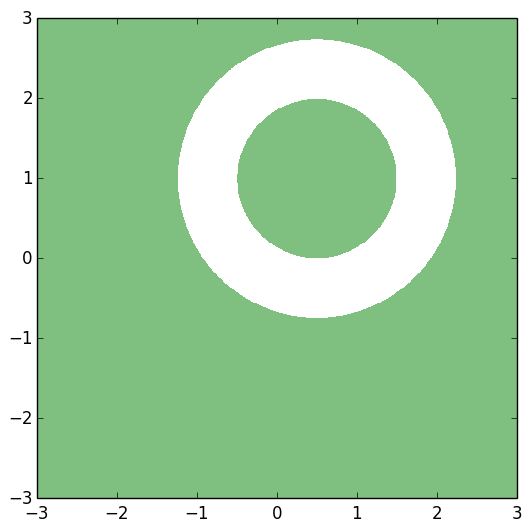

(-3.0,3.0,-3.0,3.0)

In [21]:
S3 =  @separator 1 <= (x-0.5)^2 + (y-1)^2 <= 3
S3c = !S3  # complement

Y = IntervalBox(-3..3, -3..3)
inner, boundary = set_inversion(S3c, Y, ldexp(1., -7))
draw(inner)


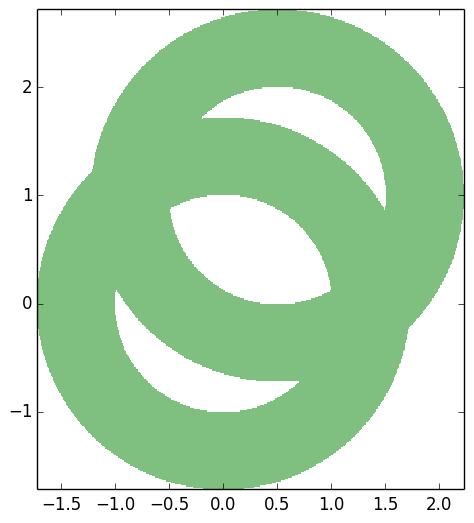

(-1.727294921875,2.227783203125,-1.72119140625,2.72216796875)

In [22]:
S2 = @separator 1 <= x^2 + y^2 <= 3
S4 = @separator 1 <= (x-0.5)^2 + (y-1)^2 <= 3
S24 = S2 ∪ S4

inner, boundary = set_inversion(S24, X, ldexp(1., -7))
draw(inner)


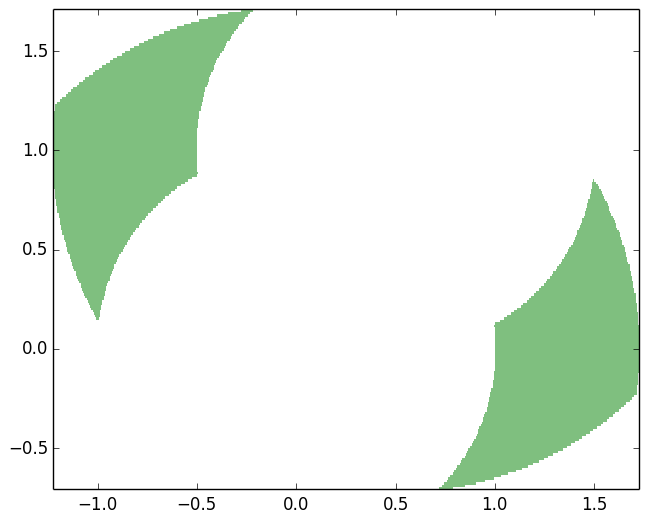

(-1.226806640625,1.7272949218749998,-0.7080078125,1.708984375)

In [24]:
S24 = S2 ∩ S4

inner, boundary = set_inversion(S24, X, ldexp(1., -7))
draw(inner)


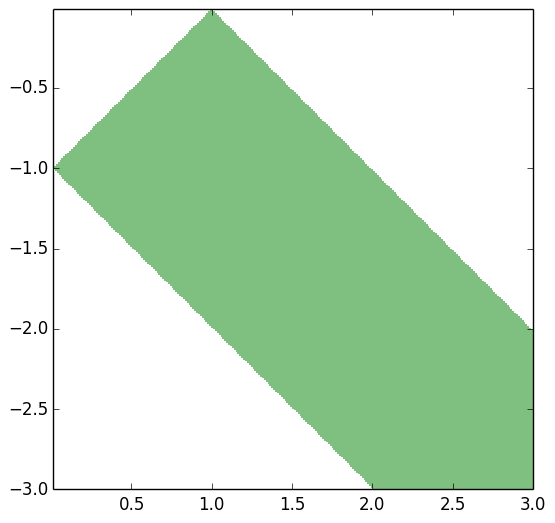

(0.01171875,3.0,-3.0,-0.01171875)

In [38]:
S5a = @separator 1 >= x+y >= -1
S5b = @separator x-y >= 1

S5 = S5a ∩ S5b

inner, boundary = set_inversion(S5, Y, ldexp(1., -7))
draw(inner)

Example from Jaulin et al., "Applied Interval Analysis", pg. 61:

 13.330383 seconds (95.02 M allocations: 2.691 GB, 14.05% gc time)


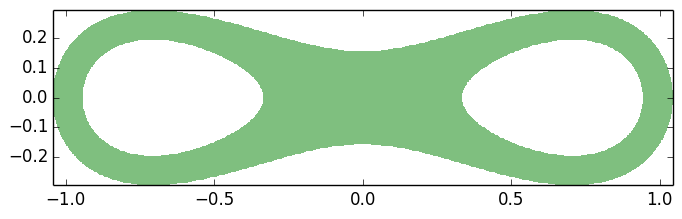

(-1.043701171875,1.0437011718749998,-0.29541015625,0.29541015625000006)

In [33]:
S6 = @separator x1^2 * (x1^2 - 1) + 4*x2^2 ∈ [-0.1, 0.1]  # 4th power not yet working correctly in powerRev
Y = IntervalBox(-10..10, -10..10)

@time inner, boundary = set_inversion(S6, Y, ldexp(1., -9))


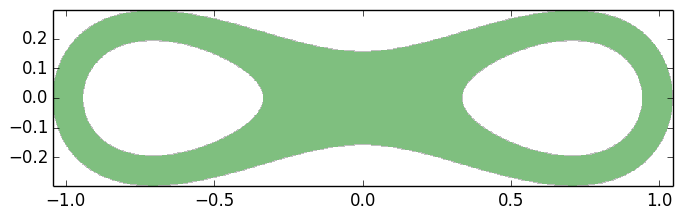

(-1.044921875,1.0449218749999998,-0.2978515625,0.29785156250000006)

In [34]:
draw(inner, boundary)